In [128]:
import numpy as np
import scipy.io as sio
import pandas as pd
from skopt import gp_minimize
from skopt import forest_minimize # Bayesian Optimization with RF as surrogate
from skopt import gbrt_minimize # Bayesian Optimization with GBM as surrogate
from skopt import Optimizer # for the optimization
from joblib import Parallel, delayed # for the parallelization
from skopt import dummy_minimize # for the randomized search
from skopt.plots import plot_convergence
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
cv = KFold(n_splits=5, shuffle=True, random_state=1)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import math
from math import pi
from skopt import gp_minimize
from skopt import forest_minimize # Bayesian Optimization with RF as surrogate
from skopt import gbrt_minimize # Bayesian Optimization with GBM as surrogate
from skopt import Optimizer # for the optimization
from joblib import Parallel, delayed # for the parallelization
from skopt import dummy_minimize # for the randomized search
from skopt.plots import plot_convergence
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
cv = KFold(n_splits=5, shuffle=True, random_state=1)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import math
from math import pi
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_absolute_percentage_error
import catboost as cb

data = pd.read_excel('data111.xlsx', sheet_name='1_17')
PC = data[['fc', 'he', 'hf', 'bw', 'bf', 'Ls_he', 'rho_sv', 'fst', 'Sst_he','rh_l', 'fy_l', 'ff', 'Ef', 'rho_f', 'Sf_he', 'alfa_f', 'V']].replace(['–', '-'], 0).astype(float)
PC['Vexp']=PC['V']
PC['v_si']=PC['V']/PC['fc']**0.5/PC['bw']/PC['he']*1000.0
X = PC[['fc', 'he', 'hf', 'bw', 'bf', 'Ls_he', 'rho_sv', 'fst', 'Sst_he','rh_l', 'fy_l', 'ff', 'Ef', 'rho_f', 'Sf_he', 'alfa_f']];     y = PC['v_si']

# Convert to numpy arrays
X, y = np.array(X.values), np.array(y.values)

scaler = MinMaxScaler(feature_range=(-1, 1))
scaler_out = MinMaxScaler(feature_range=(1, 2))
X_normalized = scaler.fit_transform(X)
y_normalized = scaler_out.fit_transform(y.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=39)

C:\Users\osama\AppData\Local\Temp\ipykernel_42996\3621749593.py:50: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  PC = data[['fc', 'he', 'hf', 'bw', 'bf', 'Ls_he', 'rho_sv', 'fst', 'Sst_he','rh_l', 'fy_l', 'ff', 'Ef', 'rho_f', 'Sf_he', 'alfa_f', 'V']].replace(['–', '-'], 0).astype(float)


In [28]:
import pandas as pd
from scipy.stats import skew, kurtosis 
from tabulate import tabulate

data = pd.read_excel('data111.xlsx', sheet_name='1_17')
PC = data[['fc', 'he', 'hf', 'bw', 'bf', 'Ls_he', 'rho_sv', 'fst', 'Sst_he','rh_l', 'fy_l', 'ff', 'Ef', 'rho_f', 'Sf_he', 'alfa_f', 'V']].replace(['–', '-'], 0).astype(float)
PC['Vexp']=PC['V']
PC['v_si']=PC['V']/PC['fc']**0.5/PC['bw']/PC['he']*1000.0
X = PC[['fc', 'he', 'hf', 'bw', 'bf', 'Ls_he', 'rho_sv', 'fst', 'Sst_he','rh_l', 'fy_l', 'ff', 'Ef', 'rho_f', 'Sf_he', 'alfa_f']];     y = PC['v_si']

PC['Vexp'] = PC['V']
PC['v_si'] = PC['V'] / (PC['fc'] ** 0.5 * PC['bw'] * PC['he']) * 1000.0

# Define the full set of features
features = ['fc', 'he', 'hf', 'bw', 'bf', 'Ls_he', 'rho_sv', 'fst', 'Sst_he',
            'rh_l', 'fy_l', 'ff', 'Ef', 'rho_f', 'Sf_he', 'alfa_f', 'v_si']

# Calculate correlation matrix for all features (using full data)
correlation_matrix = PC[features].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Compute statistical properties for all features using the full data
data_stats = pd.DataFrame({
    'Min': PC[features].min(),
    'Max': PC[features].max(),
    'Mean': PC[features].mean(),
    'Std': PC[features].std(),
    'Skewness': PC[features].apply(skew),
    'Kurtosis': PC[features].apply(kurtosis)
})
print(data_stats)

# Now, override statistics for Sf_he using only rows where Sf_he != 5 and Sst_he != 5.
mask = (PC['Sf_he'] != 5)
Sf_he_filtered = PC.loc[mask, 'Sf_he']

data_stats.loc['Sf_he', 'Min']      = Sf_he_filtered.min()
data_stats.loc['Sf_he', 'Max']      = Sf_he_filtered.max()
data_stats.loc['Sf_he', 'Mean']     = Sf_he_filtered.mean()
data_stats.loc['Sf_he', 'Std']      = Sf_he_filtered.std()
data_stats.loc['Sf_he', 'Skewness'] = skew(Sf_he_filtered)
data_stats.loc['Sf_he', 'Kurtosis'] = kurtosis(Sf_he_filtered)

# Display the statistical properties
print("\nStatistical Properties:")
print(data_stats)
# Now, override statistics for Sf_he using only rows where Sf_he != 5 and Sst_he != 5.
mask = (PC['Sst_he'] != 5)
Sf_he_filtered = PC.loc[mask, 'Sst_he']

data_stats.loc['Sst_he', 'Min']      = Sf_he_filtered.min()
data_stats.loc['Sst_he', 'Max']      = Sf_he_filtered.max()
data_stats.loc['Sst_he', 'Mean']     = Sf_he_filtered.mean()
data_stats.loc['Sst_he', 'Std']      = Sf_he_filtered.std()
data_stats.loc['Sst_he', 'Skewness'] = skew(Sf_he_filtered)
data_stats.loc['Sst_he', 'Kurtosis'] = kurtosis(Sf_he_filtered)

# Display the statistical properties
print("\nStatistical Properties:")
print(data_stats)

Correlation Matrix:
              fc        he        hf        bw        bf     Ls_he    rho_sv  \
fc      1.000000  0.137648  0.168021 -0.008393  0.146483  0.117071 -0.035232   
he      0.137648  1.000000  0.702219  0.039518  0.702976 -0.169201 -0.384753   
hf      0.168021  0.702219  1.000000 -0.181663  0.960661  0.108999 -0.086058   
bw     -0.008393  0.039518 -0.181663  1.000000  0.040866  0.106383 -0.177367   
bf      0.146483  0.702976  0.960661  0.040866  1.000000  0.136758 -0.116779   
Ls_he   0.117071 -0.169201  0.108999  0.106383  0.136758  1.000000  0.205229   
rho_sv -0.035232 -0.384753 -0.086058 -0.177367 -0.116779  0.205229  1.000000   
fst     0.130250  0.144560  0.280836  0.108870  0.333359  0.204002  0.468348   
Sst_he -0.116087 -0.079269 -0.130279 -0.115155 -0.155281 -0.098227 -0.652974   
rh_l    0.196715  0.071105  0.456201  0.010823  0.503822  0.305577  0.112401   
fy_l    0.231716  0.397256  0.413851  0.072837  0.472681 -0.120396 -0.210578   
ff     -0.070641 -0.

C:\Users\osama\AppData\Local\Temp\ipykernel_42996\1812501118.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  PC = data[['fc', 'he', 'hf', 'bw', 'bf', 'Ls_he', 'rho_sv', 'fst', 'Sst_he','rh_l', 'fy_l', 'ff', 'Ef', 'rho_f', 'Sf_he', 'alfa_f', 'V']].replace(['–', '-'], 0).astype(float)


In [10]:
from scipy.stats import skew, kurtosis
from tabulate import tabulate
features = ['fc', 'he', 'hf', 'bw', 'bf', 'Ls_he', 'rho_sv', 'fst', 'Sst_he','rh_l', 'fy_l', 'ff', 'Ef', 'rho_f', 'Sf_he', 'alfa_f', 'v_si']
X1=PC[features]
correlation_matrix = X1.corr()
print(correlation_matrix)
data_stats = pd.DataFrame()

# Calculate statistical properties for each feature
data_stats['Min'] = PC[features].min()
data_stats['Max'] = PC[features].max()
data_stats['Mean'] = PC[features].mean()
data_stats['Std'] = PC[features].std()
data_stats['Skewness'] = PC[features].apply(skew)
data_stats['Kurtosis'] = PC[features].apply(kurtosis)

# Display the statistical properties
print(data_stats)


              fc        he        hf        bw        bf     Ls_he    rho_sv  \
fc      1.000000  0.137648  0.168021 -0.008393  0.146483  0.117071 -0.035232   
he      0.137648  1.000000  0.702219  0.039518  0.702976 -0.169201 -0.384753   
hf      0.168021  0.702219  1.000000 -0.181663  0.960661  0.108999 -0.086058   
bw     -0.008393  0.039518 -0.181663  1.000000  0.040866  0.106383 -0.177367   
bf      0.146483  0.702976  0.960661  0.040866  1.000000  0.136758 -0.116779   
Ls_he   0.117071 -0.169201  0.108999  0.106383  0.136758  1.000000  0.205229   
rho_sv -0.035232 -0.384753 -0.086058 -0.177367 -0.116779  0.205229  1.000000   
fst     0.130250  0.144560  0.280836  0.108870  0.333359  0.204002  0.468348   
Sst_he -0.116087 -0.079269 -0.130279 -0.115155 -0.155281 -0.098227 -0.652974   
rh_l    0.196715  0.071105  0.456201  0.010823  0.503822  0.305577  0.112401   
fy_l    0.216077  0.400568  0.418201  0.079450  0.477424 -0.116575 -0.195929   
ff     -0.070641 -0.024237 -0.026843  0.

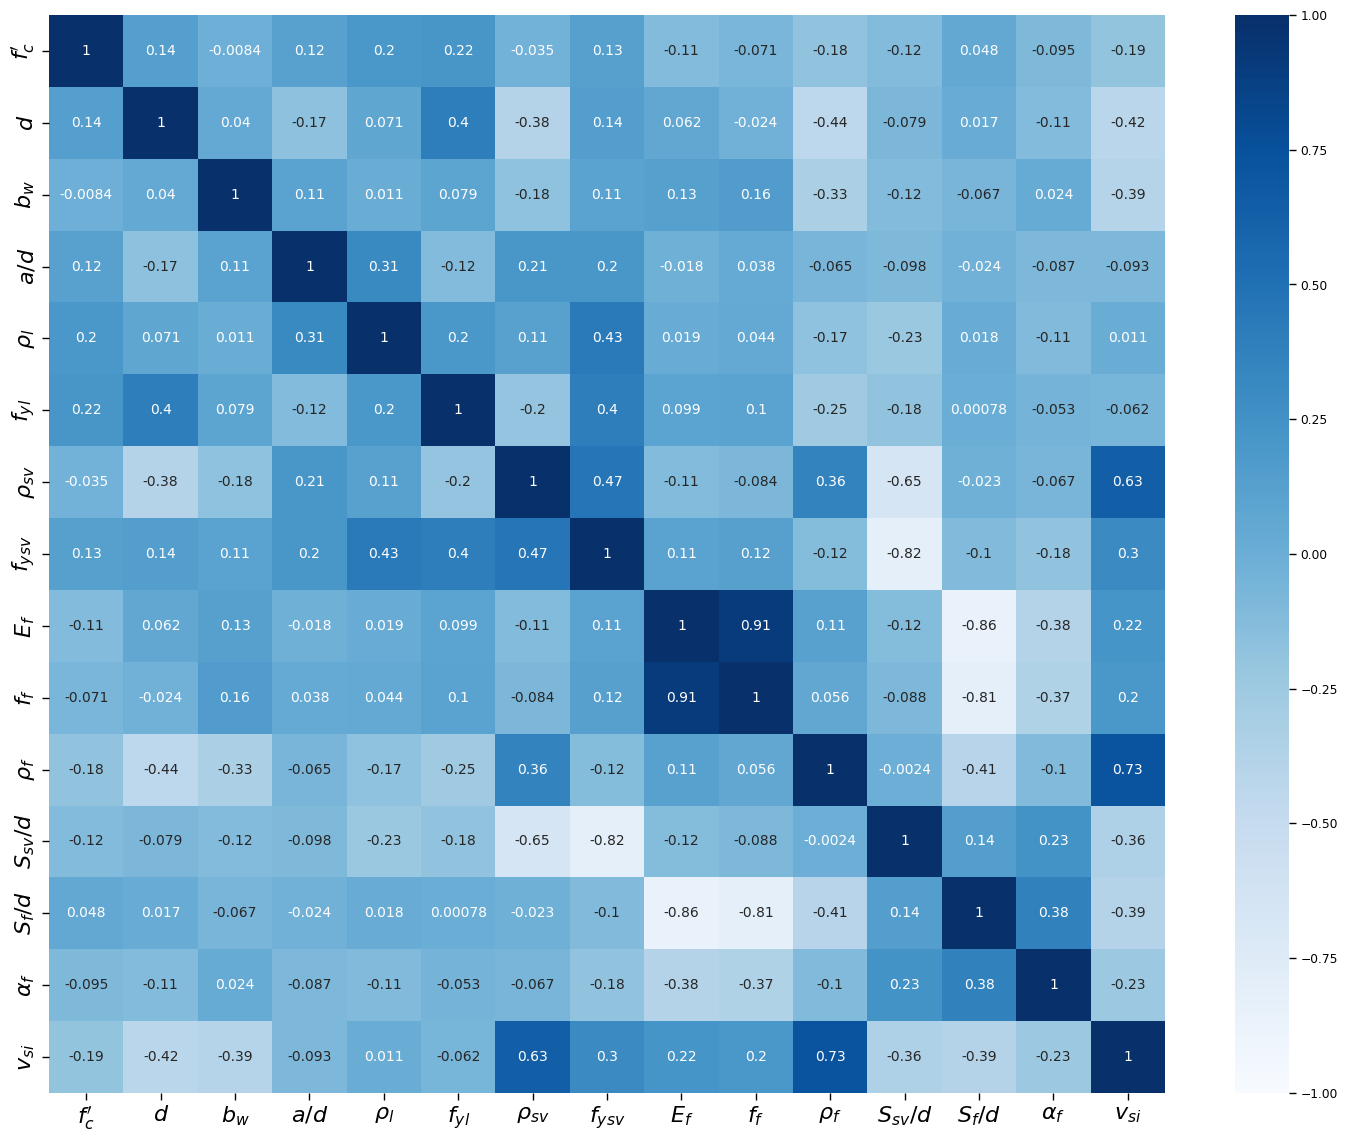

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
x_vars = ['fc',                    'he', 'bw', 'Ls_he',  'rh_l', 'fy_l',          'rho_sv', 'fst',     'Ef',   'ff','rho_f', 'Sst_he',     'Sf_he', 'alfa_f', 'v_si'];X1=PC[x_vars]
column_labels = ['$f^\\prime_c$','$d$', '$b_w$','$a/d$','$\\rho_l$','$f_{yl}$','$\\rho_{sv}$','$f_{ysv}$','$E_f$','$f_f$','$\\rho_f$','$S_{sv}/d$','$S_f/d$','$\\alpha_f$','$v_{si}$']#\\tilde{p}

# Calculate Pearson's correlation coefficient between features (X1)
correlation_matrix = X1.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(18, 14),)
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", vmin=-1, vmax=1, center=0)

sns.set_context("paper", rc={"font.size": 10, "axes.titlesize": 12, "axes.labelsize": 12})
plt.xticks(fontsize=16);plt.yticks(fontsize=16)
plt.xticks(ticks=np.arange(len(column_labels)) + 0.5, labels=column_labels)
plt.yticks(ticks=np.arange(len(column_labels)) + 0.5, labels=column_labels)
plt.savefig("correlation_1_17.png")

# Show the colorbar as a side bar

# Display the plot
plt.show()


c:\Users\osama\anaconda3\lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


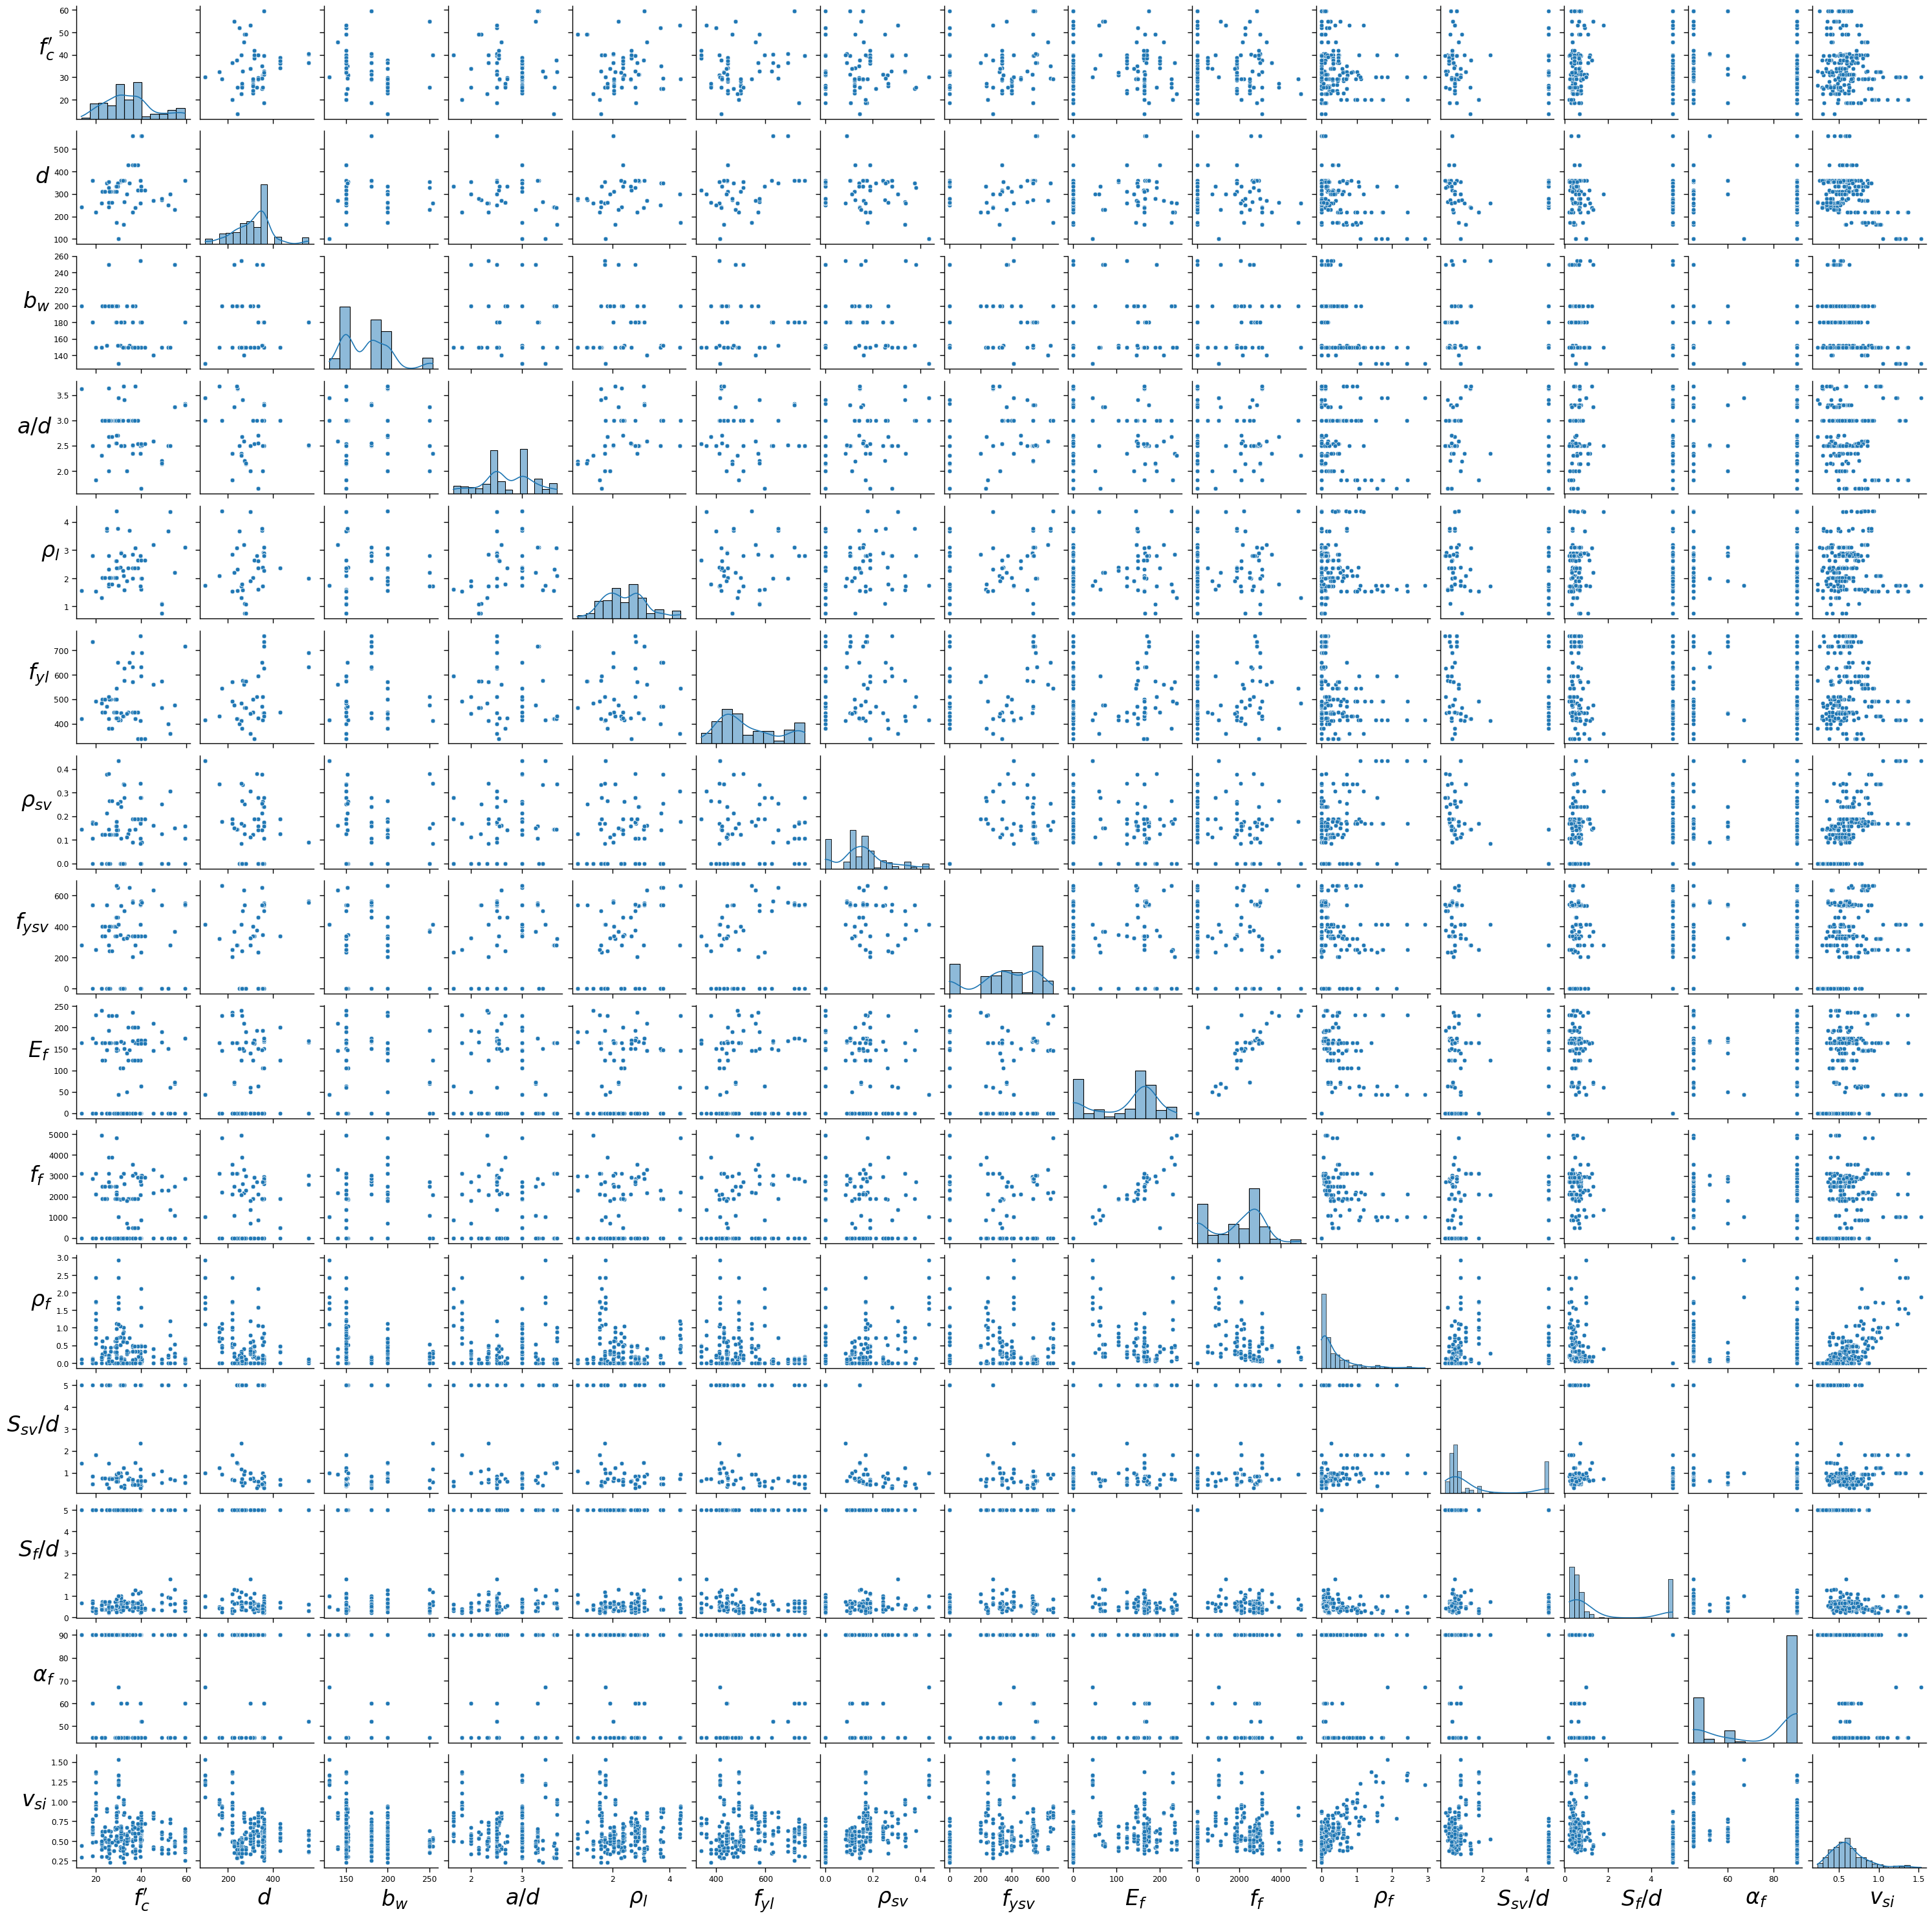

In [15]:
X1=PC[x_vars]
aa=column_labels
pairplot = sns.pairplot(X1, size=2, diag_kind='hist', diag_kws={'kde': True}, x_vars=x_vars)
i=0;j=0;font_size=24
for ax in pairplot.axes.flatten():
    ax.set_xlabel(aa[i],fontsize=font_size)
    ax.set_ylabel(aa[j],fontsize=font_size, rotation = 0)
    i=i+1
    if i==len(aa):
        i=0;j=j+1
    if j==len(aa):j=0
    ax.yaxis.get_label().set_horizontalalignment('right')
    ax.xaxis.get_label().set_horizontalalignment('left')
plt.savefig("correlation1_1_17.png")


# Machine Learning tunning and training

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import optuna
import xgboost as xgb

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 10, 2000),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.2, log=True),
        "gamma": trial.suggest_float("gamma",0.01, 100, log=True),
        "max_depth": trial.suggest_int("max_depth", 1, 50),
        #"num_leaves": trial.suggest_int("num_leaves", 10, 31),
        "boosting_type": trial.suggest_categorical("booster", ['gbtree', 'dart']),#, 'rf'
    }
    model = xgb.XGBRegressor(**params)
    value = np.mean(cross_val_score(model, X_train,y_train,cv=cv,n_jobs=-1,scoring='neg_mean_absolute_percentage_error'))
    return -value

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=300,n_jobs=-1)
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

[I 2025-02-27 13:00:39,476] A new study created in memory with name: no-name-9ff43980-73c9-430f-8cec-6af720289d88
[I 2025-02-27 13:00:40,943] Trial 13 finished with value: 0.04114868716724659 and parameters: {'n_estimators': 162, 'learning_rate': 0.047334829300759225, 'gamma': 0.01705882766163155, 'max_depth': 14, 'booster': 'dart'}. Best is trial 13 with value: 0.04114868716724659.
[I 2025-02-27 13:00:41,588] Trial 0 finished with value: 0.09269005058758305 and parameters: {'n_estimators': 1612, 'learning_rate': 0.008164384760738174, 'gamma': 22.13040220806321, 'max_depth': 20, 'booster': 'gbtree'}. Best is trial 13 with value: 0.04114868716724659.
[I 2025-02-27 13:00:41,783] Trial 6 finished with value: 0.08930878694523536 and parameters: {'n_estimators': 1617, 'learning_rate': 0.001857368552753347, 'gamma': 46.36260318606819, 'max_depth': 2, 'booster': 'dart'}. Best is trial 13 with value: 0.04114868716724659.
[I 2025-02-27 13:00:41,859] Trial 5 finished with value: 0.33862082949633

Best hyperparameters: {'n_estimators': 1149, 'learning_rate': 0.09181270788184204, 'gamma': 0.010014157002344221, 'max_depth': 19, 'booster': 'dart'}
Best RMSE: 0.03794744568938575


In [130]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
aa=xgb.XGBRegressor(random_state=1000,n_estimators=228, max_depth=44, learning_rate=0.19987002271665893, booster='gbtree', gamma=0.010098005435322485)
aa=xgb.XGBRegressor(random_state=1000,n_estimators=1149, max_depth=19, learning_rate=0.09181270788184204, booster='dart', gamma=0.010014157002344221)
#value = np.mean(cross_val_score(aa, X_train,y_train,cv=cv,n_jobs=-1,scoring='neg_mean_absolute_percentage_error'))*-1
aa.fit(X_train,y_train)
rmse = mean_absolute_percentage_error(y_test, aa.predict(X_test))
print(rmse)

#save data
X1_test=np.concatenate((X_test, X_train), axis=0);y1_test=np.concatenate((y_test, y_train), axis=0)
y1_pred = aa.predict(X1_test)
divide=scaler_out.inverse_transform(y1_pred.reshape(-1, 1))/scaler_out.inverse_transform(y1_test.reshape(-1, 1))
X1=scaler.inverse_transform(X1_test);y1=scaler_out.inverse_transform(y1_test)
data=np.concatenate((X1,y1.reshape(-1, 1)),axis=1)
data1 = scaler_out.inverse_transform(y1_pred.reshape(-1, 1))
data2=np.concatenate((data,data1),axis=1)

df = pd.DataFrame(data2)
df.columns=['fc', 'he', 'hf', 'bw', 'bf', 'Ls_he', 'rho_sv', 'fst', 'Sst_he','rh_l', 'fy_l', 'ff', 'Ef', 'rho_f', 'Sf_he', 'alfa_f', 'Vexp', 'Vpred'];PC=df
df['Vexp'] = df['Vexp'] * (df['fc']**0.5 * df['bw'] * df['he']) / 1000.0
df['Vpred'] = df['Vpred'] * (df['fc']**0.5 * df['bw'] * df['he']) / 1000.0
filename = 'XGB_V_FRP_EXT_1_17.xlsx'
df.to_excel(filename, index=False)

0.028061165242834148


C:\Users\osama\AppData\Local\Temp\ipykernel_42996\3040434644.py:24: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  df.to_excel(filename, index=False)


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import optuna
from lightgbm.sklearn import LGBMRegressor

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 2000),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.2, log=True),
        #"gamma": trial.suggest_float("gamma",0.01, 100, log=True),
        "max_depth": trial.suggest_int("max_depth", 16, 50),
        "num_leaves": trial.suggest_int("num_leaves", 10, 31),
        "boosting_type": trial.suggest_categorical("boosting_type", ['gbdt', 'dart']),#, 'rf'
    }
    model = LGBMRegressor(**params)
    value = np.mean(cross_val_score(model, X_train,y_train,cv=cv,n_jobs=-1,scoring='neg_mean_absolute_percentage_error'))
    return -value

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=300,n_jobs=-1)
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

[I 2025-02-27 13:02:32,416] A new study created in memory with name: no-name-28f09b55-6c8b-4375-bfd0-3aedc7b08b9e
[I 2025-02-27 13:02:40,714] Trial 1 finished with value: 0.03651592088737244 and parameters: {'n_estimators': 1054, 'learning_rate': 0.014267213370410802, 'max_depth': 28, 'num_leaves': 17, 'boosting_type': 'gbdt'}. Best is trial 1 with value: 0.03651592088737244.
[I 2025-02-27 13:02:44,634] Trial 10 finished with value: 0.4746890340294785 and parameters: {'n_estimators': 665, 'learning_rate': 0.002913922908809094, 'max_depth': 36, 'num_leaves': 25, 'boosting_type': 'dart'}. Best is trial 1 with value: 0.03651592088737244.
[I 2025-02-27 13:02:45,035] Trial 2 finished with value: 0.03738893441309219 and parameters: {'n_estimators': 283, 'learning_rate': 0.04060521164655489, 'max_depth': 43, 'num_leaves': 11, 'boosting_type': 'gbdt'}. Best is trial 1 with value: 0.03651592088737244.
[I 2025-02-27 13:02:45,423] Trial 0 finished with value: 0.06657628211779054 and parameters: {

Best hyperparameters: {'n_estimators': 1271, 'learning_rate': 0.16302564504107, 'max_depth': 29, 'num_leaves': 25, 'boosting_type': 'dart'}
Best RMSE: 0.03427383065050491


In [131]:
from lightgbm.sklearn import LGBMRegressor
aa=LGBMRegressor(n_estimators=1271,learning_rate=0.16302564504107, max_depth=29, num_leaves=25, boosting_type='dart')
#value = np.mean(cross_val_score(aa, X_train,y_train,cv=cv,n_jobs=-1,scoring='neg_mean_absolute_percentage_error'))*-1
aa.fit(X_train,y_train)
rmse = mean_absolute_percentage_error(y_test, aa.predict(X_test))
print(rmse)

#save data
X1_test=np.concatenate((X_test, X_train), axis=0);y1_test=np.concatenate((y_test, y_train), axis=0)
y1_pred = aa.predict(X1_test)
divide=scaler_out.inverse_transform(y1_pred.reshape(-1, 1))/scaler_out.inverse_transform(y1_test.reshape(-1, 1))
X1=scaler.inverse_transform(X1_test);y1=scaler_out.inverse_transform(y1_test)
data=np.concatenate((X1,y1.reshape(-1, 1)),axis=1)
data1 = scaler_out.inverse_transform(y1_pred.reshape(-1, 1))
data2=np.concatenate((data,data1),axis=1)

df = pd.DataFrame(data2)
df.columns=['fc', 'he', 'hf', 'bw', 'bf', 'Ls_he', 'rho_sv', 'fst', 'Sst_he','rh_l', 'fy_l', 'ff', 'Ef', 'rho_f', 'Sf_he', 'alfa_f', 'Vexp', 'Vpred'];PC=df
df['Vexp'] = df['Vexp'] * (df['fc']**0.5 * df['bw'] * df['he']) / 1000.0
df['Vpred'] = df['Vpred'] * (df['fc']**0.5 * df['bw'] * df['he']) / 1000.0
filename = 'LGBM_V_FRP_EXT_1_17.xlsx'
df.to_excel(filename, index=False)

c:\Users\osama\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 404
[LightGBM] [Info] Number of data points in the train set: 212, number of used features: 16
[LightGBM] [Info] Start training from score 1.291576
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\osama\AppData\Local\Temp\ipykernel_42996\1722898540.py:22: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  df.to_excel(filename, index=False)


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import optuna
from sklearn.ensemble import RandomForestRegressor

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 2000),
        #"learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 1, 50),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 2, 50),
        "max_features": trial.suggest_categorical("max_features", ['sqrt','log2']),
        "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),        
    }
    model = RandomForestRegressor(**params)
    value = np.mean(cross_val_score(model, X_train,y_train,cv=cv,n_jobs=-1,scoring='neg_mean_absolute_percentage_error'))# optimization function (hyperparam response function)
    return -value 
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=300,n_jobs=-1)#os.cpu_count()-1
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

[I 2025-02-27 12:56:12,116] A new study created in memory with name: no-name-05c065ab-5b6f-4196-83b4-7b52c068f859
[I 2025-02-27 12:56:14,842] Trial 1 finished with value: 0.06295915973364849 and parameters: {'n_estimators': 1188, 'max_depth': 31, 'min_samples_leaf': 21, 'max_features': 'log2', 'bootstrap': True}. Best is trial 1 with value: 0.06295915973364849.
[I 2025-02-27 12:56:16,239] Trial 0 finished with value: 0.06947484660376271 and parameters: {'n_estimators': 1443, 'max_depth': 6, 'min_samples_leaf': 29, 'max_features': 'log2', 'bootstrap': True}. Best is trial 1 with value: 0.06295915973364849.
[I 2025-02-27 12:56:16,862] Trial 2 finished with value: 0.04946526961810471 and parameters: {'n_estimators': 1731, 'max_depth': 40, 'min_samples_leaf': 15, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 2 with value: 0.04946526961810471.
[I 2025-02-27 12:56:17,643] Trial 4 finished with value: 0.0739665467426411 and parameters: {'n_estimators': 376, 'max_depth': 44, 'min_

Best hyperparameters: {'n_estimators': 1903, 'max_depth': 39, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': False}
Best RMSE: 0.036394781523552897


In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
aa=RandomForestRegressor(random_state=1000,n_estimators=1903, max_depth=39, min_samples_leaf=2, max_features='log2', bootstrap=False)
print(np.mean(cross_val_score(aa, X_train,y_train,cv=cv,n_jobs=-1,scoring='neg_mean_absolute_percentage_error'))*-1)
aa.fit(X_train,y_train)
rmse = mean_absolute_percentage_error(y_test, aa.predict(X_test))
print(rmse)

#save data
X1_test=np.concatenate((X_test, X_train), axis=0);y1_test=np.concatenate((y_test, y_train), axis=0)
y1_pred = aa.predict(X1_test)
divide=scaler_out.inverse_transform(y1_pred.reshape(-1, 1))/scaler_out.inverse_transform(y1_test.reshape(-1, 1))
X1=scaler.inverse_transform(X1_test);y1=scaler_out.inverse_transform(y1_test)
data=np.concatenate((X1,y1.reshape(-1, 1)),axis=1)
data1 = scaler_out.inverse_transform(y1_pred.reshape(-1, 1))
data2=np.concatenate((data,data1),axis=1)

df = pd.DataFrame(data2)
df.columns=['fc', 'he', 'hf', 'bw', 'bf', 'Ls_he', 'rho_sv', 'fst', 'Sst_he','rh_l', 'fy_l', 'ff', 'Ef', 'rho_f', 'Sf_he', 'alfa_f', 'Vexp', 'Vpred'];PC=df
df['Vexp'] = df['Vexp'] * (df['fc']**0.5 * df['bw'] * df['he']) / 1000.0
df['Vpred'] = df['Vpred'] * (df['fc']**0.5 * df['bw'] * df['he']) / 1000.0
filename = 'RF_V_FRP_EXT_1_17.xlsx'
df.to_excel(filename, index=False)

0.0364267144279031


c:\Users\osama\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.02760980740706971


C:\Users\osama\AppData\Local\Temp\ipykernel_42996\567747417.py:23: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  df.to_excel(filename, index=False)


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from ngboost import NGBRegressor
from ngboost.distns import Normal
from ngboost.scores import MLE
import optuna
from sklearn.model_selection import cross_val_score

# Define the objective function for Optuna
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 2000),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.2, log=True),
        "minibatch_frac": trial.suggest_float("minibatch_frac", 0.1, 1.0),
        "natural_gradient": trial.suggest_categorical("natural_gradient", [True, False]),
    }
    model = NGBRegressor(
        Dist=Normal,
        Score=MLE,
        n_estimators=params["n_estimators"],
        learning_rate=params["learning_rate"],
        minibatch_frac=params["minibatch_frac"],
        natural_gradient=params["natural_gradient"],
    )
    value = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_percentage_error', n_jobs=-1))
    return -value

# Optimize hyperparameters using Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=300, n_jobs=-1)
print('Best hyperparameters:', study.best_params)
print('Best MAPE:', study.best_value)

[I 2025-02-27 13:17:58,307] A new study created in memory with name: no-name-e01caf91-5a77-483d-a9d2-b02f16820dfe


[I 2025-02-27 13:18:01,835] Trial 1 finished with value: 0.05209849031725777 and parameters: {'n_estimators': 148, 'learning_rate': 0.00655918680278068, 'minibatch_frac': 0.6659950468176766, 'natural_gradient': False}. Best is trial 1 with value: 0.05209849031725777.
[I 2025-02-27 13:18:01,916] Trial 0 finished with value: 0.03708717820662395 and parameters: {'n_estimators': 152, 'learning_rate': 0.16995129486359614, 'minibatch_frac': 0.88417311888036, 'natural_gradient': True}. Best is trial 0 with value: 0.03708717820662395.
[I 2025-02-27 13:18:39,004] Trial 3 finished with value: 0.03625368676931064 and parameters: {'n_estimators': 1476, 'learning_rate': 0.02897304052460399, 'minibatch_frac': 0.22369759500171432, 'natural_gradient': True}. Best is trial 3 with value: 0.03625368676931064.
[I 2025-02-27 13:18:47,492] Trial 14 finished with value: 0.036694368543748634 and parameters: {'n_estimators': 670, 'learning_rate': 0.003501103396935727, 'minibatch_frac': 0.17525178794207158, 'na

Best hyperparameters: {'n_estimators': 1490, 'learning_rate': 0.003167194057465303, 'minibatch_frac': 0.3022394738067564, 'natural_gradient': False}
Best MAPE: 0.03245866822636741


In [142]:
#a = study.best_params
from ngboost import NGBRegressor
from ngboost.distns import Normal
from ngboost.scores import MLE
ngb_model = NGBRegressor(Dist=Normal,Score=MLE, n_estimators=378,learning_rate=0.022762116239819483,minibatch_frac=0.6232519714609615,natural_gradient=True)
#ngb_model = NGBRegressor(Dist=Normal,Score=MLE, n_estimators=1490,learning_rate=0.003167194057465303,minibatch_frac=0.3022394738067564,natural_gradient=True)

ngb_model.fit(X_train, y_train)

# Evaluate the model
y_pred = ngb_model.predict(X_test)
rmse = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error: {rmse}")

# Save data
X1_test = np.concatenate((X_test, X_train), axis=0)
y1_test = np.concatenate((y_test, y_train), axis=0)
y1_pred = ngb_model.predict(X1_test)

# Transform data back to original scale
divide = scaler_out.inverse_transform(y1_pred.reshape(-1, 1)) / scaler_out.inverse_transform(y1_test.reshape(-1, 1))
X1 = scaler.inverse_transform(X1_test)
y1 = scaler_out.inverse_transform(y1_test)
data = np.concatenate((X1, y1.reshape(-1, 1)), axis=1)
data1 = scaler_out.inverse_transform(y1_pred.reshape(-1, 1))
data2 = np.concatenate((data, data1), axis=1)

# Create a DataFrame
df = pd.DataFrame(data2)
df.columns = ['fc', 'he', 'hf', 'bw', 'bf', 'Ls_he', 'rho_sv', 'fst', 'Sst_he','rh_l', 'fy_l', 'ff', 'Ef', 'rho_f', 'Sf_he', 'alfa_f', 'Vexp', 'Vpred']
df['Vexp'] = df['Vexp'] * (df['fc']**0.5 * df['bw'] * df['he']) / 1000.0
df['Vpred'] = df['Vpred'] * (df['fc']**0.5 * df['bw'] * df['he']) / 1000.0
# Save to Excel
filename = 'NGB_V_FRP_EXT_1_17.xlsx'
df.to_excel(filename, index=False)

c:\Users\osama\anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[iter 0] loss=-0.3773 val_loss=0.0000 scale=1.0000 norm=0.5756
[iter 100] loss=-1.8522 val_loss=0.0000 scale=2.0000 norm=0.6908
[iter 200] loss=-2.2838 val_loss=0.0000 scale=1.0000 norm=0.3266
[iter 300] loss=-2.5221 val_loss=0.0000 scale=1.0000 norm=0.3069
Mean Absolute Percentage Error: 0.02458204200587641


C:\Users\osama\AppData\Local\Temp\ipykernel_42996\900018048.py:35: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  df.to_excel(filename, index=False)


In [21]:
import catboost as cb
import optuna
def objective(trial):
    params = {
        "iterations":trial.suggest_int("iterations", 100, 2000),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 16),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = cb.CatBoostRegressor(**params, silent=True)
    value = np.mean(cross_val_score(model, X_train,y_train,cv=cv,n_jobs=-1,scoring='neg_mean_absolute_percentage_error'))# optimization function (hyperparam response function)
    return -value

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=300,n_jobs=-1)
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

[I 2025-02-27 13:50:48,726] A new study created in memory with name: no-name-51c95b72-d8aa-43f8-9097-6047cdd48798
[I 2025-02-27 13:50:52,886] Trial 3 finished with value: 0.0652428828013285 and parameters: {'iterations': 1576, 'learning_rate': 0.0010784687958144815, 'depth': 2, 'subsample': 0.15796833896122076, 'colsample_bylevel': 0.5834349329914199, 'min_data_in_leaf': 83}. Best is trial 3 with value: 0.0652428828013285.
[I 2025-02-27 13:50:57,857] Trial 2 finished with value: 0.049001207217035665 and parameters: {'iterations': 519, 'learning_rate': 0.005734515437587628, 'depth': 3, 'subsample': 0.8465622625234155, 'colsample_bylevel': 0.5518227033617416, 'min_data_in_leaf': 91}. Best is trial 2 with value: 0.049001207217035665.
[I 2025-02-27 13:52:12,565] Trial 1 finished with value: 0.06070274821588867 and parameters: {'iterations': 1527, 'learning_rate': 0.0013667030065489956, 'depth': 12, 'subsample': 0.14601056302544269, 'colsample_bylevel': 0.15439014434704074, 'min_data_in_lea

Best hyperparameters: {'iterations': 1322, 'learning_rate': 0.03939699969947018, 'depth': 7, 'subsample': 0.6561447557244202, 'colsample_bylevel': 0.1100465192061941, 'min_data_in_leaf': 50}
Best RMSE: 0.029512094557267842


In [134]:
import catboost as cb
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
#{'iterations': 753, 'learning_rate': 0.05807497865908674, 'depth': 2, 'subsample': 0.7104636008183888, 'colsample_bylevel': 0.6358119594188057, 'min_data_in_leaf': 98}. Best is trial 24 with value: 0.026104111679491015.

aa=cb.CatBoostRegressor(iterations=1322,learning_rate=0.03939699969947018,depth=7,subsample=0.6561447557244202,colsample_bylevel=0.1100465192061941,min_data_in_leaf= 50)
#value = np.mean(cross_val_score(aa, X_train,y_train,cv=cv,n_jobs=-1,scoring='neg_mean_absolute_percentage_error'))*-1
aa.fit(X_train,y_train)
rmse = mean_absolute_percentage_error(y_test, aa.predict(X_test))
print(rmse)

#save data
X1_test=np.concatenate((X_test, X_train), axis=0);y1_test=np.concatenate((y_test, y_train), axis=0)
y1_pred = aa.predict(X1_test)
divide=scaler_out.inverse_transform(y1_pred.reshape(-1, 1))/scaler_out.inverse_transform(y1_test.reshape(-1, 1))
X1=scaler.inverse_transform(X1_test);y1=scaler_out.inverse_transform(y1_test)
data=np.concatenate((X1,y1.reshape(-1, 1)),axis=1)
data1 = scaler_out.inverse_transform(y1_pred.reshape(-1, 1))
data2=np.concatenate((data,data1),axis=1)

df = pd.DataFrame(data2)
df.columns=['fc', 'he', 'hf', 'bw', 'bf', 'Ls_he', 'rho_sv', 'fst', 'Sst_he','rh_l', 'fy_l', 'ff', 'Ef', 'rho_f', 'Sf_he', 'alfa_f', 'Vexp', 'Vpred'];PC=df
df['Vexp'] = df['Vexp'] * (df['fc']**0.5 * df['bw'] * df['he']) / 1000.0
df['Vpred'] = df['Vpred'] * (df['fc']**0.5 * df['bw'] * df['he']) / 1000.0
filename = 'CB_V_FRP_EXT_1_17.xlsx'
df.to_excel(filename, index=False)

0:	learn: 0.1639825	total: 139ms	remaining: 3m 3s
1:	learn: 0.1620050	total: 140ms	remaining: 1m 32s
2:	learn: 0.1588468	total: 141ms	remaining: 1m 2s
3:	learn: 0.1563131	total: 142ms	remaining: 46.6s
4:	learn: 0.1563129	total: 142ms	remaining: 37.3s
5:	learn: 0.1563127	total: 142ms	remaining: 31.1s
6:	learn: 0.1542572	total: 142ms	remaining: 26.7s
7:	learn: 0.1534815	total: 143ms	remaining: 23.4s
8:	learn: 0.1507378	total: 143ms	remaining: 20.9s
9:	learn: 0.1482657	total: 144ms	remaining: 18.9s
10:	learn: 0.1454674	total: 145ms	remaining: 17.3s
11:	learn: 0.1432301	total: 145ms	remaining: 15.9s
12:	learn: 0.1432221	total: 146ms	remaining: 14.7s
13:	learn: 0.1432216	total: 146ms	remaining: 13.6s
14:	learn: 0.1419251	total: 146ms	remaining: 12.7s
15:	learn: 0.1400397	total: 147ms	remaining: 12s
16:	learn: 0.1400390	total: 147ms	remaining: 11.3s
17:	learn: 0.1372505	total: 147ms	remaining: 10.7s
18:	learn: 0.1372497	total: 147ms	remaining: 10.1s
19:	learn: 0.1359897	total: 148ms	remainin

C:\Users\osama\AppData\Local\Temp\ipykernel_42996\1699203487.py:25: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  df.to_excel(filename, index=False)


# SVR

In [46]:
import pso
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import math

num_folds=5
def objective_function(params):
    C, epsilon, gamma = params
    mse_scores = []
    
    # Split the data into folds
    fold_size = len(X_train) // num_folds
    folds_X = np.array_split(X_train, num_folds)
    folds_y = np.array_split(y_train, num_folds)
    
    # Perform cross-validation
    for i in range(num_folds):
        # Create the SVR model
        model = SVR(C=math.exp(C), epsilon=math.exp(epsilon), gamma=math.exp(gamma))
        
        # Merge the data for training and testing
        X_test_fold,X_train_fold = folds_X[i], np.concatenate(folds_X[:i] + folds_X[i+1:])
        y_test_fold,y_train_fold = folds_y[i], np.concatenate(folds_y[:i] + folds_y[i+1:])

        # Train the model and predict
        model.fit(X_train_fold, y_train_fold.reshape(-1))
        y_pred_fold = model.predict(X_test_fold)
        
        # Calculate the mean squared error
        divide = scaler_out.inverse_transform(y_pred_fold.reshape(-1, 1))/scaler_out.inverse_transform(y_test_fold.reshape(-1, 1))
        mse_fold = np.std(divide)
        
        mse_scores.append(mse_fold)
    
    # Calculate the mean of the mse scores
    mse = np.mean(mse_scores)
    return mse
lower_bound = [-3., -100.,-10.]
upper_bound = [5., -10., 20.]


# Define Optimization Problem
problem = {'CostFunction': objective_function, 'nVar': 3, 'VarMin': lower_bound, 'VarMax': upper_bound}

# Running PSO
gbest, pop = pso.PSO(problem, MaxIter = 10, PopSize = 100, c1 = 1.0, c2 = 1.0, w = 0.1, wdamp = 0.1)
# Final Result
print('Global Best:')
print(gbest)


Iteration 0: Best Cost = 0.12447278361401497
Iteration 1: Best Cost = 0.12374349766798473
Iteration 2: Best Cost = 0.12349199676099201
Iteration 3: Best Cost = 0.12342142995171423
Iteration 4: Best Cost = 0.12341895121401174
Iteration 5: Best Cost = 0.12333880537343636
Iteration 6: Best Cost = 0.12329179493597427
Iteration 7: Best Cost = 0.1232855848151491
Iteration 8: Best Cost = 0.12327172887147661
Iteration 9: Best Cost = 0.12327172887147661
Global Best:
{'position': array([ -0.3704108 , -85.71267308,  -2.00914272]), 'cost': 0.12327172887147661}


In [47]:
score = objective_function(gbest['position'])
print(gbest['cost'])
C, epsilon, gamma = gbest['position']#0.98377012, -69.37560749,   3.35051143

#increase number of particles from 50 to 500 #0.96109455, -27.71123196,   3.36205192
#[  0.95663944, -61.30657623,   3.36564107]), 'cost': 0.06111466489637234}
aa = SVR(C=math.exp(C), epsilon=math.exp(epsilon), gamma=math.exp(gamma))
aa.fit(X_train, y_train.reshape(-1))
#save data
X1_test=np.concatenate((X_test, X_train), axis=0);y1_test=np.concatenate((y_test, y_train), axis=0)
y1_pred = aa.predict(X1_test)
divide=scaler_out.inverse_transform(y1_pred.reshape(-1, 1))/scaler_out.inverse_transform(y1_test.reshape(-1, 1))
X1=scaler.inverse_transform(X1_test);y1=scaler_out.inverse_transform(y1_test)
data=np.concatenate((X1,y1.reshape(-1, 1)),axis=1)
data1 = scaler_out.inverse_transform(y1_pred.reshape(-1, 1))
data2=np.concatenate((data,data1),axis=1)

df = pd.DataFrame(data2)
df.columns=['fc', 'he', 'hf', 'bw', 'bf', 'Ls_he', 'rho_sv', 'fst', 'Sst_he','rh_l', 'fy_l', 'ff', 'Ef', 'rho_f', 'Sf_he', 'alfa_f', 'Vexp', 'Vpred'];PC=df

filename = 'SVR_V_FRP_EXT_1_17.xlsx'
df.to_excel(filename, index=False)

0.12327172887147661


C:\Users\osama\AppData\Local\Temp\ipykernel_572\720812653.py:22: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  df.to_excel(filename, index=False)


# GaussianProcessRegressor

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,ConstantKernel, WhiteKernel,RationalQuadratic,Matern
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import math
pi = math.pi
from sklearn.model_selection import cross_val_score

# Define the GPR model
gpr = GaussianProcessRegressor()
gpr.kernel = (
    ConstantKernel(1.0, constant_value_bounds=(1e-5, 1e5)) *
    RBF(length_scale=1.0, length_scale_bounds=(1e-5, 1e5)) +
    ConstantKernel(1.0, constant_value_bounds=(1e-5, 1e5)) *
    Matern(length_scale=1.0, length_scale_bounds=(1e-5, 1e5), nu=1.0) +
    ConstantKernel(1.0, constant_value_bounds=(1e-5, 1e5)) *
    WhiteKernel(noise_level=0.1) +
    ConstantKernel(1.0, constant_value_bounds=(1e-5, 1e5)) *
    RationalQuadratic(length_scale=1, alpha=1)
)

# Set up the parameter grid for alpha
alpha_values = [0.001,0.005,0.0001,0.0003,0.0005,0.001,0.0013]  # Add more values if needed

# Perform cross-validation to find the best alpha
best_alpha = None
best_score = -np.inf
for alpha in alpha_values:
    gpr.alpha = alpha
    scores = cross_val_score(gpr, X_train, y_train.reshape(-1, 1), cv=5)  # Use your desired number of folds
    mean_score = np.mean(scores)
    if mean_score > best_score:
        best_score = mean_score
        best_alpha = alpha

# Fit the GPR model with the best alpha
gpr.alpha = best_alpha
gpr.fit(X_train, y_train.reshape(-1, 1))

# Make predictions using the trained model
y_pred, y_std = gpr.predict(X_normalized, return_std=True)

c:\Users\osama\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\osama\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [49]:
print(best_alpha)

0.0013


In [136]:
if y_normalized.ndim>1 and y_normalized.shape[1]==1:y_tot=np.squeeze(y_normalized,axis=1)
y_tot11=y_tot;y_std11=y_std;y_pred11=y_pred
#print(best_alpha)0.0001

In [ ]:
#save data
X1_test=np.concatenate((X_test, X_train), axis=0);y1_test=np.concatenate((y_test, y_train), axis=0)
y1_pred = gpr.predict(X1_test)
divide=scaler_out.inverse_transform(y1_pred.reshape(-1, 1))/scaler_out.inverse_transform(y1_test.reshape(-1, 1))
X1=scaler.inverse_transform(X1_test);y1=scaler_out.inverse_transform(y1_test)
data=np.concatenate((X1,y1.reshape(-1, 1)),axis=1)
data1 = scaler_out.inverse_transform(y1_pred.reshape(-1, 1))
data2=np.concatenate((data,data1),axis=1)
df = pd.DataFrame(data2)

df.columns=['fc', 'he', 'hf', 'bw', 'bf', 'Ls_he', 'rho_sv', 'fst', 'Sst_he','rh_l', 'fy_l', 'ff', 'Ef', 'rho_f', 'Sf_he', 'alfa_f', 'Vexp', 'Vpred'];PC=df
#df['Vexp'] = df['Vexp'] * (df['fc']**0.5 * df['bw'] * df['he']) / 1000.0
#df['Vpred'] = df['Vpred'] * (df['fc']**0.5 * df['bw'] * df['he']) / 1000.0
filename = 'GPR_V_FRP_EXT_1_17.xlsx'
df.to_excel(filename, index=False)
if y_tot.ndim>1 and y_tot.shape[1]==1:y_tot=np.squeeze(y_tot,axis=1)
y_tot11=y_tot;y_std11=y_std;y_pred11=y_pred

C:\Users\osama\AppData\Local\Temp\ipykernel_42996\374951964.py:15: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  df.to_excel(filename, index=False)


# Proposed Design

In [105]:
import math
import numpy as np
def calculate_shear_capacity(fc, he, hf, bw, bf, Ls_he, fstAst, Sst_he, Al, ff, EfAf, Sf_he, alpha_f, Rg):
    L_d=Ls_he
    sst=Sst_he;sf=Sf_he;si_co=np.sin(alpha_f)+np.cos(alpha_f)
    fr=EfAf/bw/he/fc;fs=fstAst/bw/he
    Vc = (L_d ** -1.46) * (fc ** 1.02) * 0.138
    Vs = (fc ** 0.16) * (fs ** (sst * 1.7))
    Vf = fc ** (0.0056 * fr) * (sf ** -0.25) * si_co
    V = (Vc + Vs + Vf)*bw*he
    return V/1000.0

import pandas as pd
import numpy as np
import math
data = pd.read_excel('data111.xlsx', sheet_name='1_17')
PC = data[data['ff'] != 0][['fc', 'he', 'hf', 'bw', 'bf', 'Ls_he', 'fstAst', 'Sst_he', 'Al', 'ff', 'EfAf', 'Sf_he', 'Rg', 'alfa_f', 'V']].copy()
PC['Vexp'] = PC['V']  # Assuming 'V' is the experimental shear capacity
PC['alfa_f'] = PC['alfa_f'] * (np.pi / 180)
PC['Vpred'] = PC.apply(lambda row: calculate_shear_capacity(
    row['fc'], row['he'], row['hf'], row['bw'], row['bf'], row['Ls_he'], 
    row['fstAst'], row['Sst_he'], row['Al'], row['ff'], row['EfAf'], row['Sf_he'], 
    row['alfa_f'], row['Rg']
), axis=1)
PC['Ratio'] =  PC['Vexp']/PC['Vpred'];average_ratio = PC['Ratio'].mean();std_dev_ratio = PC['Ratio'].std()
cov = std_dev_ratio / average_ratio
print(f'Average of Vexp/Vpred: {average_ratio:.4f}')
print(f'Coefficient of Variation: {cov:.4f}')
output_file = 'Prop_V_FRP_EXT_1_17.xlsx'
PC[['Vexp', 'Vpred', 'Ratio']].to_excel(output_file, index=False)
print(f"Results have been saved to {output_file}")

Average of Vexp/Vpred: 1.0009
Coefficient of Variation: 0.1375
Results have been saved to Prop_V_FRP_EXT_1_17.xlsx


C:\Users\osama\AppData\Local\Temp\ipykernel_42996\2845690888.py:30: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  PC[['Vexp', 'Vpred', 'Ratio']].to_excel(output_file, index=False)


# Perera et al.

In [152]:
import math

def calculate_shear_capacity(fc, he, hf, bw, bf, Ls_he, fstAst, Sst_he, Al, ff, EfAf, Sf_he, alpha_f, Rg,rhos,rhof,Ef):
    L_d=Ls_he
    sst=Sst_he;sf=Sf_he;si_co=np.sin(alpha_f)+np.cos(alpha_f)
    fr=EfAf/bw/he/fc
    fs=fstAst/bw/he
    Vc = (L_d ** -0.469) * (fc ** 0.735) * 0.784
    # Steel stirrups contribution to shear capacity
    Vs = 1.816*fs*sst
    #
    # NSM FRP contribution to shear capacity
    if abs(rhof)<0.0001:
        Vf=0.0
    else:
        Vf =1.735*Ef*si_co*(fr/sf/Ef*fc/1000.0)**1.549*(fc/Ef/rhof*100)**1.119
    #print(Vf/(Vc + Vs + Vf))
    # Total shear capacity
    V = (Vc + Vs + Vf)*bw*he
    return V/1000.0


import pandas as pd
import numpy as np
import math
# Assuming you've already defined the function 'calculate_shear_capacity'
# Load the data
data = pd.read_excel('data111.xlsx', sheet_name='1_17')
PC = data[data['ff'] != 0][['fc', 'he', 'hf', 'bw', 'bf', 'Ls_he', 'fstAst', 'Sst_he', 'Al', 'ff', 'EfAf', 'Sf_he', 'Rg', 'alfa_f','rho_sv','rho_f','Ef', 'V']].copy().replace(['–', '-'], 0).astype(float)
PC['Vexp'] = PC['V']  # Assuming 'V' is the experimental shear capacity
# Convert angles from degrees to radians if necessary
# Apply the function to each row
PC['alfa_f'] = PC['alfa_f'] * (np.pi / 180)
PC['Vpred'] = PC.apply(lambda row: calculate_shear_capacity(
    row['fc'], row['he'], row['hf'], row['bw'], row['bf'], row['Ls_he'], 
    row['fstAst'], row['Sst_he'], row['Al'], row['ff'], row['EfAf'], row['Sf_he'], 
    row['alfa_f'], row['Rg'],row['rho_sv'],row['rho_f'],row['Ef']
), axis=1)
# Calculate the ratio Vexp/Vpred
print(min(PC['Vexp']))
PC['Ratio'] =  PC['Vpred']/PC['Vexp']
print(PC.iterrows())
for index, row in PC.iterrows():
    if row['Ratio'] > 10:
        print("Row {}: Vpred = {}, Vexp = {}".format(index, row['Vpred'], row['Vexp']))
# Compute the average and coefficient of variation
average_ratio = PC['Ratio'].mean()
std_dev_ratio = PC['Ratio'].std()
cov = std_dev_ratio / average_ratio
print(f'Average of Vexp/Vpred: {average_ratio:.4f}')
print(f'Coefficient of Variation: {cov:.4f}')
# Export 'Ratio', 'Vexp', and 'Vpred' to an Excel file
output_file = 'Perera_V_FRP_EXT_1_17.xlsx'
PC[['Vexp', 'Vpred', 'Ratio']].to_excel(output_file, index=False)
print(f"Results have been saved to {output_file}")

51.54545454545455
<generator object DataFrame.iterrows at 0x0000027C2F6753C0>
Average of Vexp/Vpred: 3.1468
Coefficient of Variation: 0.2745
Results have been saved to Perera_V_FRP_EXT_1_17.xlsx


C:\Users\osama\AppData\Local\Temp\ipykernel_42996\4184799460.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  PC = data[data['ff'] != 0][['fc', 'he', 'hf', 'bw', 'bf', 'Ls_he', 'fstAst', 'Sst_he', 'Al', 'ff', 'EfAf', 'Sf_he', 'Rg', 'alfa_f','rho_sv','rho_f','Ef', 'V']].copy().replace(['–', '-'], 0).astype(float)
C:\Users\osama\AppData\Local\Temp\ipykernel_42996\4184799460.py:54: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  PC[['Vexp', 'Vpred', 'Ratio']].to_excel(output_file, index=False)


# Ke et al.

In [108]:
import math

def calculate_shear_capacity(fc, he, hf, bw, bf, Ls_he, fstAst, Sst_he, Al, ff, EfAf, Sf_he, alpha_f, Rg):
    # Constants
    C1, C2, C3, C4, C5 = 0.948, 0.530, 1.013, 0.812, -1.984
    C6, C7 = 2.727, -0.938
    C8, C9, C10, C11, C12, C13 = 5.406, 1.023, 0.335, -0.543, 1.447, 0.074
    EfAf= EfAf/2.0
    fstAst = fstAst/2.0
    # Concrete contribution to shear capacity
    Vc = C1 * (fc ** C2) * bw * (he ** C3) * ((1 + (bf * hf) / (bw * he)) ** C4) * ((Ls_he) ** C5)
    
    # Steel stirrups contribution to shear capacity
    Vs = C6 * fstAst * ((Sst_he) ** C7)
    
    # NSM FRP contribution to shear capacity
    Vf = C8 * (fc ** C9) * ((EfAf) ** C10) * ((Sf_he) ** C11) * ((math.sin(alpha_f) + math.cos(alpha_f)) ** C12) * (Rg ** C13)
    
    # Total shear capacity
    V = Vc + Vs + Vf
    
    return V/1000.0

import pandas as pd
import numpy as np
import math
# Assuming you've already defined the function 'calculate_shear_capacity'
# Load the data
data = pd.read_excel('data111.xlsx', sheet_name='1_17')
PC = data[data['ff'] != 0][['fc', 'he', 'hf', 'bw', 'bf', 'Ls_he', 'fstAst', 'Sst_he', 'Al', 'ff', 'EfAf', 'Sf_he', 'Rg', 'alfa_f', 'V']].copy().replace(['–', '-'], 0).astype(float)
PC['Vexp'] = PC['V']  # Assuming 'V' is the experimental shear capacity
# Convert angles from degrees to radians if necessary
PC['alfa_f'] = PC['alfa_f'] * (np.pi / 180)
# Apply the function to each row
PC['Vpred'] = PC.apply(lambda row: calculate_shear_capacity(
    row['fc'], row['he'], row['hf'], row['bw'], row['bf'], row['Ls_he'], 
    row['fstAst'], row['Sst_he'], row['Al'], row['ff'], row['EfAf'], row['Sf_he'], 
    row['alfa_f'], row['Rg']
), axis=1)
# Calculate the ratio Vexp/Vpred
PC['Ratio'] =  PC['Vexp']/PC['Vpred']
# Compute the average and coefficient of variation
average_ratio = PC['Ratio'].mean()
std_dev_ratio = PC['Ratio'].std()
cov = std_dev_ratio / average_ratio
print(f'Average of Vexp/Vpred: {average_ratio:.4f}')
print(f'Coefficient of Variation: {cov:.4f}')
# Export 'Ratio', 'Vexp', and 'Vpred' to an Excel file
output_file = 'Ke_V_FRP_EXT_1_17.xlsx'
PC[['Vexp', 'Vpred', 'Ratio']].to_excel(output_file, index=False)
print(f"Results have been saved to {output_file}")

Average of Vexp/Vpred: 1.1639
Coefficient of Variation: 0.1973
Results have been saved to Ke_V_FRP_EXT_1_17.xlsx


C:\Users\osama\AppData\Local\Temp\ipykernel_42996\285084163.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  PC = data[data['ff'] != 0][['fc', 'he', 'hf', 'bw', 'bf', 'Ls_he', 'fstAst', 'Sst_he', 'Al', 'ff', 'EfAf', 'Sf_he', 'Rg', 'alfa_f', 'V']].copy().replace(['–', '-'], 0).astype(float)
C:\Users\osama\AppData\Local\Temp\ipykernel_42996\285084163.py:50: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.3' currently installed).
  PC[['Vexp', 'Vpred', 'Ratio']].to_excel(output_file, index=False)


In [ ]:
import math
import numpy as np
def calculate_shear_capacity(fc, he, hf, bw, bf, Ls_he, fstAst, Sst_he, Al, ff, EfAf, Sf_he, alpha_f, Rg):
    L_d=Ls_he
    sst=Sst_he;sf=Sf_he;si_co=np.sin(alpha_f/180*math.pi)+np.cos(alpha_f/180*math.pi)
    fr=EfAf/bw/he/fc
    fs=fstAst/bw/he
    Vc = (L_d ** -1.459) * (fc ** 1.0165) * 0.14723
    # Steel stirrups contribution to shear capacity
    Vs = (fc ** 0.15431) * (fs ** (sst * 1.7146))
    # NSM FRP contribution to shear capacity
    Vf = (((fc *fc) ** ((0.0019053 * fr) * 1.4586)) * (sf ** -0.25283)) * si_co
    # Total shear capacity
    V = (Vc + Vs + Vf)*bw*he
    return V/1000.0

import pandas as pd
import numpy as np
import math
# Assuming you've already defined the function 'calculate_shear_capacity'
# Load the data
data = pd.read_excel('data111.xlsx', sheet_name='1_17')
PC = data[data['ff'] != 0][['fc', 'he', 'hf', 'bw', 'bf', 'Ls/he', 'fst Ast', 'Sst/he', 'Al', 'ff', 'EfAf', 'Sf/he', 'Rg', 'alfa_f', 'V']].copy()
PC['Vexp'] = PC['V']  # Assuming 'V' is the experimental shear capacity
# Convert angles from degrees to radians if necessary
PC['alfa_f'] = PC['alfa_f'] * (np.pi / 180)
# Apply the function to each row
PC['Vpred'] = PC.apply(lambda row: calculate_shear_capacity(
    row['fc'], row['he'], row['hf'], row['bw'], row['bf'], row['Ls/he'], 
    row['fst Ast'], row['Sst/he'], row['Al'], row['ff'], row['EfAf'], row['Sf/he'], 
    row['alfa_f'], row['Rg']
), axis=1)
# Calculate the ratio Vexp/Vpred
PC['Ratio'] =  PC['Vexp']/PC['Vpred']
# Compute the average and coefficient of variation
average_ratio = PC['Ratio'].mean()
std_dev_ratio = PC['Ratio'].std()
cov = std_dev_ratio / average_ratio
print(f'Average of Vexp/Vpred: {average_ratio:.4f}')
print(f'Coefficient of Variation: {cov:.4f}')
# Export 'Ratio', 'Vexp', and 'Vpred' to an Excel file
output_file = 'shear_capacity_results.xlsx'
PC[['Vexp', 'Vpred', 'Ratio']].to_excel(output_file, index=False)
print(f"Results have been saved to {output_file}")

NameError: name 'aaaasx' is not defined